In [ ]:
%load_ext autoreload
%autoreload 2
import matplotlib
import matplotlib.pyplot as plt
import torch
import logging

import tensorcraft as tc

log = logging.getLogger("tensorcraft")
log.setLevel("INFO")

tensor([[55, 56, 57, 58, 59],
        [60, 61, 62, 63, 64],
        [65, 66, 67, 68, 69],
        [70, 71, 72, 73, 74],
        [75, 76, 77, 78, 79],
        [80, 81, 82, 83, 84],
        [85, 86, 87, 88, 89],
        [90, 91, 92, 93, 94],
        [95, 96, 97, 98, 99]])


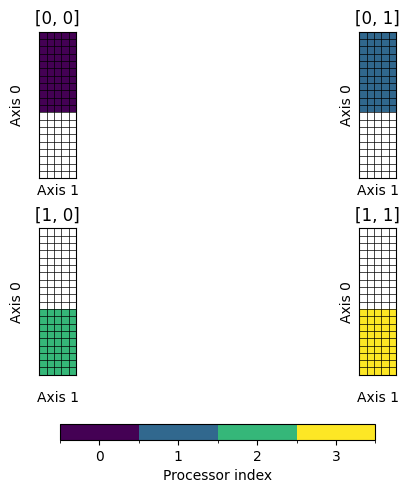

In [ ]:
rank = 3

x = torch.arange(100).reshape(20, 5)
global_shape = x.shape

mesh = torch.Size((2, 2))
dist = tc.mpi.MPIMultiAxisDist(mesh, ((0,),()), 11)

tensor_shape = x.shape
x_local = dist.apply(x, rank)
print(x_local)

fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, dist, cbar=True)

tensor([[58, 59],
        [63, 64],
        [68, 69],
        [73, 74],
        [78, 79],
        [83, 84],
        [88, 89],
        [93, 94],
        [98, 99]])


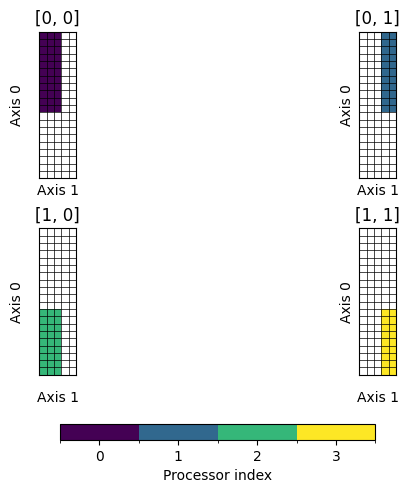

In [ ]:
new_dist, x_local_split = dist.apply_split(global_shape, x_local, rank, 1, 1, 3, minor=False)

print(x_local_split)
fig = plt.figure(layout="constrained")
tc.viz.draw_processor_grid(fig, tensor_shape, new_dist, cbar=True)

In [ ]:
rank = 0
x = torch.arange(40).reshape(2, 10, 2)
mesh = torch.Size([2,2])
dist = tc.mpi.MPIMultiAxisDist(mesh, (None, (0,1), None), 1)

x_local = dist.apply(x, rank)
print(x_local)

tensor([[[ 0,  1],
         [ 8,  9],
         [16, 17]],

        [[20, 21],
         [28, 29],
         [36, 37]]])
